In [2]:
import pandas as pd
df = pd.read_csv("healthcare-dataset-stroke-data.csv")


In [3]:
# EDA
df.head(20)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
6,53882,Male,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1
7,10434,Female,69.0,0,0,No,Private,Urban,94.39,22.8,never smoked,1
8,27419,Female,59.0,0,0,Yes,Private,Rural,76.15,NaN,Unknown,1
9,60491,Female,78.0,0,0,Yes,Private,Urban,58.57,24.2,Unknown,1


In [4]:
df.isna().sum()


id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


<Axes: >

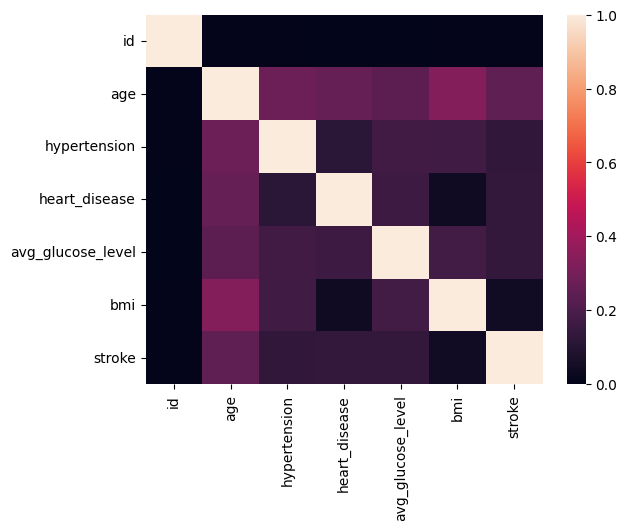

In [7]:
import seaborn as sns
sns.heatmap(df.corr(numeric_only=True))

In [8]:
# Dropping bmi as it's low impact factor (no need to add missing vals just remove this bud)
df = df.drop('bmi', axis=1)
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,never smoked,1


In [9]:
df.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'smoking_status',
       'stroke'],
      dtype='object')

In [10]:
from scipy.stats import zscore
import numpy as np
threshold = 3
numeric_features = ['avg_glucose_level', 'age', 'id']
z_score = np.abs(zscore(df[numeric_features]))
z_score

array([[2.70637544, 1.05143428, 1.29831203],
       [2.12155854, 0.78607007, 0.71637149],
       [0.0050283 , 1.62639008, 0.25547819],
       ...,
       [0.51144264, 0.36384151, 0.79371959],
       [1.32825706, 0.34379639, 0.04849658],
       [0.46086746, 0.03420481, 0.38569496]], shape=(5110, 3))

In [11]:
outliers = np.where(z_score> threshold)
print(outliers)

(array([  33,   45,  122,  123,  135,  193,  196,  220,  243,  256,  303,
        330,  386,  552,  755,  785, 1067, 1070, 1113, 1207, 1384, 1436,
       1453, 1529, 1626, 2182, 2203, 2293, 2462, 2494, 2633, 2693, 2751,
       3088, 3215, 3342, 3393, 4048, 4249, 4283, 4356, 4447, 4457, 4470,
       4598, 4711, 4909, 4983, 5034]), array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0]))


In [12]:
from scipy.stats.mstats import winsorize
df['id'] = winsorize(df['id'], limits=[0.15, 0.15])
df['age'] = winsorize(df['age'], limits=[0.15, 0.15])
df['avg_glucose_level'] = winsorize(df['avg_glucose_level'], limits=[0.15, 0.15])

In [13]:
df.head(20)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,smoking_status,stroke
0,10649,Male,67.0,0,1,Yes,Private,Urban,145.26,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,145.26,never smoked,1
2,31112,Male,69.0,0,1,Yes,Private,Rural,105.92,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,145.26,smokes,1
4,10649,Female,69.0,1,0,Yes,Self-employed,Rural,145.26,never smoked,1
5,56669,Male,69.0,0,0,Yes,Private,Urban,145.26,formerly smoked,1
6,53882,Male,69.0,1,1,Yes,Private,Rural,70.11,never smoked,1
7,10649,Female,69.0,0,0,No,Private,Urban,94.39,never smoked,1
8,27419,Female,59.0,0,0,Yes,Private,Rural,76.15,Unknown,1
9,60491,Female,69.0,0,0,Yes,Private,Urban,70.11,Unknown,1


In [14]:
# Now we'll handle categorical data into numerical ones with OrdinalEncoder as we want to keep the ranking same
from sklearn.preprocessing import OrdinalEncoder
encoder = OrdinalEncoder()
df['gender'] = encoder.fit_transform(df[['gender']])
df['work_type'] = encoder.fit_transform(df[['work_type']])
df['ever_married'] = encoder.fit_transform(df[['ever_married']])
df['Residence_type'] = encoder.fit_transform(df[['Residence_type']])
df['smoking_status'] = encoder.fit_transform(df[['smoking_status']])


In [15]:
df.head(5)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,smoking_status,stroke
0,10649,1.0,67.0,0,1,1.0,2.0,1.0,145.26,1.0,1
1,51676,0.0,61.0,0,0,1.0,3.0,0.0,145.26,2.0,1
2,31112,1.0,69.0,0,1,1.0,2.0,0.0,105.92,2.0,1
3,60182,0.0,49.0,0,0,1.0,2.0,1.0,145.26,3.0,1
4,10649,0.0,69.0,1,0,1.0,3.0,0.0,145.26,2.0,1


In [16]:
# dependent and independent features
x = df.iloc[:, :-1].astype(int)
y = df['stroke'].astype(int)    
# spliting of data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [17]:
class_weight = dict({0:1, 1:100})

In [18]:
# training the model
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
classifier = GradientBoostingClassifier()

In [19]:
# parameters
parameters = {
    'n_estimators': [100, 200], 
    'learning_rate': [0.01, 0.1],   
    'max_depth': [3, 5],         
    'max_features': ['sqrt', 'log2'], 
    'subsample': [0.7, 0.8]     
}

param_grid_randomF = {
    'n_estimators': [50, 100, 200],  
    'max_depth': [None, 10, 20, 30],  
    'max_features': ['sqrt', 'log2', None],  
}

In [20]:
# hyper paramter tuning using gridsearchCV
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(estimator=classifier, param_grid=parameters, scoring='accuracy', cv=5, n_jobs=-1, verbose=True)
grid.fit(x_train, y_train)

Fitting 5 folds for each of 32 candidates, totalling 160 fits


,estimator,GradientBoostingClassifier()
,param_grid,"{'learning_rate': [0.01, 0.1], 'max_depth': [3, 5], 'max_features': ['sqrt', 'log2'], 'n_estimators': [100, 200], ...}"
,scoring,'accuracy'
,n_jobs,-1
,refit,True
,cv,5
,verbose,True
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,loss,'log_loss'


In [21]:
grid.best_score_

np.float64(0.9532779894240063)

In [22]:
y_pred = grid.predict(x_test)
from sklearn.metrics import accuracy_score,classification_report
print(f"score: {accuracy_score(y_test, y_pred)} \n ")
print(f"report: {classification_report(y_test, y_pred)}")

score: 0.9442270058708415 
 
report:               precision    recall  f1-score   support

           0       0.94      1.00      0.97       965
           1       0.00      0.00      0.00        57

    accuracy                           0.94      1022
   macro avg       0.47      0.50      0.49      1022
weighted avg       0.89      0.94      0.92      1022



d:\Coding\Personal\Learning\ML\Scikit-learn for ML\ml\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
d:\Coding\Personal\Learning\ML\Scikit-learn for ML\ml\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
d:\Coding\Personal\Learning\ML\Scikit-learn for ML\ml\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(averag

In [23]:
df['stroke'].value_counts()

stroke
0    4861
1     249
Name: count, dtype: int64

In [24]:
from collections import Counter
Counter(y_train)

Counter({0: 3896, 1: 192})

In [320]:
## UnderSampling - reduce the points of maximum labels - disadvantage is loss of data but krna toh hoga-
from imblearn.under_sampling import NearMiss
ns = NearMiss(sampling_strategy=0.1)
x_train_ns, y_train_ns = ns.fit_resample(x_train, y_train)
print("classes before fit: {}".format(Counter(y_train)))
print("classes after fit: {}".format(Counter(y_train_ns)))

classes before fit: Counter({0: 3896, 1: 192})
classes after fit: Counter({0: 1920, 1: 192})


In [321]:
from sklearn.ensemble import GradientBoostingClassifier
classifier = GradientBoostingClassifier()
classifier.fit(x_train_ns, y_train_ns)

,loss,'log_loss'
,learning_rate,0.1
,n_estimators,100
,subsample,1.0
,criterion,'friedman_mse'
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_depth,3
,min_impurity_decrease,0.0
,init,None


In [322]:
y_pred = classifier.predict(x_test)
print(f"report: {classification_report(y_test, y_pred)}")

report:               precision    recall  f1-score   support

           0       0.96      0.92      0.94       965
           1       0.18      0.30      0.23        57

    accuracy                           0.89      1022
   macro avg       0.57      0.61      0.58      1022
weighted avg       0.91      0.89      0.90      1022



In [786]:
# Oversampling - increase the minority labels in data -
from imblearn.over_sampling import RandomOverSampler, SMOTE
os = RandomOverSampler(sampling_strategy=0.8)
x_train_os, y_train_os = os.fit_resample(x_train, y_train)
print("numbe ropf classes before fit: {}".format(Counter(y_train)))
print("numbe ropf classes after fit: {}".format(Counter(y_train_os)))


numbe ropf classes before fit: Counter({0: 3896, 1: 192})
numbe ropf classes after fit: Counter({0: 3896, 1: 3116})


In [787]:
from sklearn.ensemble import GradientBoostingClassifier
classifier = GradientBoostingClassifier()
classifier.fit(x_train_os, y_train_os)

,loss,'log_loss'
,learning_rate,0.1
,n_estimators,100
,subsample,1.0
,criterion,'friedman_mse'
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_depth,3
,min_impurity_decrease,0.0
,init,None


In [788]:
y_pred = classifier.predict(x_test)
print(f"report: {classification_report(y_test,y_pred)}")

report:               precision    recall  f1-score   support

           0       0.97      0.80      0.88       965
           1       0.16      0.63      0.25        57

    accuracy                           0.79      1022
   macro avg       0.57      0.72      0.57      1022
weighted avg       0.93      0.79      0.84      1022



In [789]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(x_train, y_train)

,priors,None
,var_smoothing,1e-09


In [790]:
y_pred = nb.predict(x_test)
print(f"report: {classification_report(y_test, y_pred)}")

report:               precision    recall  f1-score   support

           0       0.95      0.99      0.97       965
           1       0.38      0.05      0.09        57

    accuracy                           0.94      1022
   macro avg       0.66      0.52      0.53      1022
weighted avg       0.91      0.94      0.92      1022



In [889]:
# SMOTETomek
from imblearn.combine import SMOTETomek
smote_tomek = SMOTETomek(sampling_strategy=0.8)
x_train_sm, y_train_sm = smote_tomek.fit_resample(x_train,y_train)
print("the number of classes before fit: {}".format(Counter(y_train_sm)))
print("the number of classes after fit: {}".format(Counter(y_train_sm)))

the number of classes before fit: Counter({0: 3644, 1: 2864})
the number of classes after fit: Counter({0: 3644, 1: 2864})


In [890]:
from sklearn.ensemble import GradientBoostingClassifier
classifier =  GradientBoostingClassifier()
classifier.fit(x_train_sm, y_train_sm)

,loss,'log_loss'
,learning_rate,0.1
,n_estimators,100
,subsample,1.0
,criterion,'friedman_mse'
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_depth,3
,min_impurity_decrease,0.0
,init,None


In [891]:
y_pred = classifier.predict(x_test)
print(f"report: {classification_report(y_test,y_pred)}")

report:               precision    recall  f1-score   support

           0       0.97      0.84      0.90       965
           1       0.17      0.56      0.26        57

    accuracy                           0.82      1022
   macro avg       0.57      0.70      0.58      1022
weighted avg       0.93      0.82      0.86      1022



In [1046]:
from imblearn.ensemble import EasyEnsembleClassifier
easy = EasyEnsembleClassifier(sampling_strategy=0.5)
easy.fit(x_train, y_train)

,n_estimators,10
,estimator,None
,warm_start,False
,sampling_strategy,0.5
,replacement,False
,n_jobs,None
,random_state,None
,verbose,0


In [1047]:
y_pred = easy.predict(x_test)
print(f"report: {classification_report(y_test, y_pred)}")

report:               precision    recall  f1-score   support

           0       0.98      0.78      0.87       965
           1       0.16      0.70      0.26        57

    accuracy                           0.78      1022
   macro avg       0.57      0.74      0.56      1022
weighted avg       0.93      0.78      0.83      1022



In [1138]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(sampling_strategy=0.9)
x_train_smote, y_train_smote = smote.fit_resample(x_train,y_train)
print("the number of classes before fit: {}".format(Counter(y_train_smote)))
print("the number of classes after fit: {}".format(Counter(y_train_smote)))

the number of classes before fit: Counter({0: 3896, 1: 3506})
the number of classes after fit: Counter({0: 3896, 1: 3506})


In [1139]:
from sklearn.ensemble import GradientBoostingClassifier
classifer =  GradientBoostingClassifier()
classifier.fit(x_train_smote, y_train_smote)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [1140]:
y_pred = classifier.predict(x_test)
print(f"report: {classification_report(y_test,y_pred)}")

report:               precision    recall  f1-score   support

           0       0.95      0.92      0.94       965
           1       0.17      0.26      0.20        57

    accuracy                           0.89      1022
   macro avg       0.56      0.59      0.57      1022
weighted avg       0.91      0.89      0.90      1022



In [1141]:
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
classifier = RandomForestClassifier(class_weight='balanced')
classifier.fit(x_train_smote, y_train_smote)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [1142]:
y_pred = classifier.predict(x_test)
from sklearn.metrics import accuracy_score,classification_report
print(f"score: {accuracy_score(y_test, y_pred)} \n ")
print(f"report: {classification_report(y_test, y_pred)}")

score: 0.8855185909980431 
 
report:               precision    recall  f1-score   support

           0       0.95      0.92      0.94       965
           1       0.17      0.26      0.20        57

    accuracy                           0.89      1022
   macro avg       0.56      0.59      0.57      1022
weighted avg       0.91      0.89      0.90      1022



In [1143]:
print(np.bincount(y_pred))

[932  90]
